# Název

In [40]:
from protokol import *
import uncertainties
from uncertainties import ufloat as uf
from uncertainties.unumpy import nominal_values as noms
from uncertainties.unumpy import std_devs as stds
import uncertainties.umath as um

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (4*1.5,2.5*1.5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams["text.latex.preamble"] = r"""
\usepackage[decimalsymbol=comma]{siunitx}
"""

In [32]:
def relative(self):
    return self.s / self.n

uncertainties.core.Variable.rel = relative

## Definice

In [153]:
rozm_vzorku = {
    "l": uf(6.000, 0.005),
    "d": uf(3.350, 0.005),
    "t": uf(0.720, 0.005)
}

ItB = 0.098

r_h = 3 * sp.pi / 8
e = 1.6022e-19

In [111]:
def primka(x, a, b):
    return a*x + b

## Úkol 1

In [43]:
df_u1 = pd.read_csv("../raw/u1.txt", delim_whitespace=True).iloc[::-1]

In [44]:
df_u1.U = df_u1.U.apply(lambda h: uf(h, 0.003*h + 0.002))
df_u1.I = df_u1.I.apply(lambda h: uf(h, 0.005*h + 0.005))

In [46]:
df_u1

,U,I
9,0.2360+/-0.0027,0.496+/-0.007
8,0.4820+/-0.0034,1.016+/-0.010
7,0.705+/-0.004,1.485+/-0.012
6,0.964+/-0.005,2.038+/-0.015
5,1.163+/-0.005,2.452+/-0.017
4,1.424+/-0.006,3.011+/-0.020
3,1.637+/-0.007,3.469+/-0.022
2,1.855+/-0.008,3.939+/-0.025
1,2.091+/-0.008,4.458+/-0.027
0,2.323+/-0.009,4.967+/-0.030


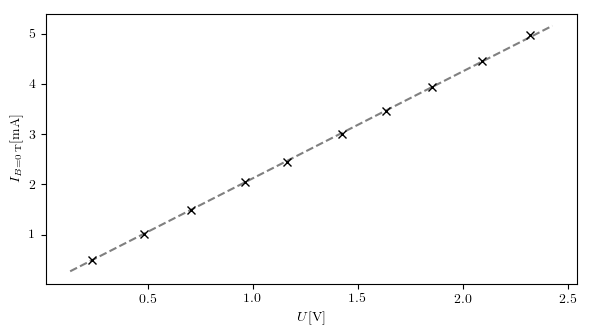

In [163]:
fig = plt.figure(figsize=(4*1.5,2.3*1.5))
ax = plt.axes()

params, errs = fit(primka, noms(df_u1.U), noms(df_u1.I), sigma=stds(df_u1.I))
A = uf(params[0], errs[0])

ax.plot(*curve(noms(df_u1.U), primka, params), "--", c="gray")
ax.plot(noms(df_u1.U), noms(df_u1.I), "xk")
ax.set_xlabel("$U[\si{V}]$")
ax.set_ylabel("$I_{B=\SI{0}{T}}[\si{mA}]$")


fig.tight_layout()
fig.savefig("../plot/u1.pdf")

## Úkol 2

In [120]:
df_1mA = pd.read_csv("../raw/u2_1mA.txt", delim_whitespace=True).iloc[::-1].reset_index().drop("index", 1)
df_45mA = pd.read_csv("../raw/u2_4.5mA.txt", delim_whitespace=True).iloc[::-1].reset_index().drop("index", 1)
df2s = (df_1mA, df_45mA)

In [121]:
for df in df2s:
    df.IB = df.IB.apply(lambda h: uf(h, 0.005*6))
    df.IB[0].std_dev = df.IB[1].std_dev = 0.005 * 1.2
    df.U1 = df.U1.apply(lambda h: uf(h, 0.0005*h + 0.03))
    df.U2 = df.U2.apply(lambda h: uf(h, 0.0005*sp.absolute(h) + 0.03))
    
df_45mA.U1[6:] = df_45mA.U1[6:].apply(lambda h: uf(h.n, 0.001*sp.absolute(h.n) + 0.3))
   
for df in df2s:
    df["U"] = (df.U1 - df.U2)/2
    df["B"] = df.IB * ItB

### 1 mA

In [122]:
df_1mA

,IB,U1,U2,U,B
0,0.500+/-0.006,17.65+/-0.04,9.050+/-0.035,4.300+/-0.026,0.0490+/-0.0006
1,1.000+/-0.006,22.37+/-0.04,4.530+/-0.032,8.920+/-0.026,0.0980+/-0.0006
2,1.500+/-0.030,26.73+/-0.04,-0.570+/-0.030,13.650+/-0.026,0.1470+/-0.0029
3,2.000+/-0.030,31.93+/-0.05,-4.580+/-0.032,18.255+/-0.028,0.1960+/-0.0029
4,2.500+/-0.030,36.37+/-0.05,-8.930+/-0.034,22.650+/-0.030,0.2450+/-0.0029
5,3.000+/-0.030,40.75+/-0.05,-13.12+/-0.04,26.935+/-0.031,0.2940+/-0.0029
6,3.500+/-0.030,44.99+/-0.05,-16.87+/-0.04,30.930+/-0.033,0.3430+/-0.0029
7,4.000+/-0.030,48.63+/-0.05,-21.04+/-0.04,34.835+/-0.034,0.3920+/-0.0029


### 4.5 mA

In [123]:
df_45mA

,IB,U1,U2,U,B
0,0.500+/-0.006,87.78+/-0.07,52.80+/-0.06,17.49+/-0.05,0.0490+/-0.0006
1,1.000+/-0.006,106.90+/-0.08,34.55+/-0.05,36.18+/-0.05,0.0980+/-0.0006
2,1.500+/-0.030,125.57+/-0.09,16.15+/-0.04,54.71+/-0.05,0.1470+/-0.0029
3,2.000+/-0.030,145.95+/-0.10,-1.250+/-0.031,73.60+/-0.05,0.1960+/-0.0029
4,2.500+/-0.030,164.35+/-0.11,-19.70+/-0.04,92.02+/-0.06,0.2450+/-0.0029
5,3.000+/-0.030,184.60+/-0.12,-37.75+/-0.05,111.17+/-0.07,0.2940+/-0.0029
6,3.500+/-0.030,202.2+/-0.5,-54.21+/-0.06,128.20+/-0.25,0.3430+/-0.0029
7,4.000+/-0.030,219.4+/-0.5,-71.58+/-0.07,145.49+/-0.26,0.3920+/-0.0029


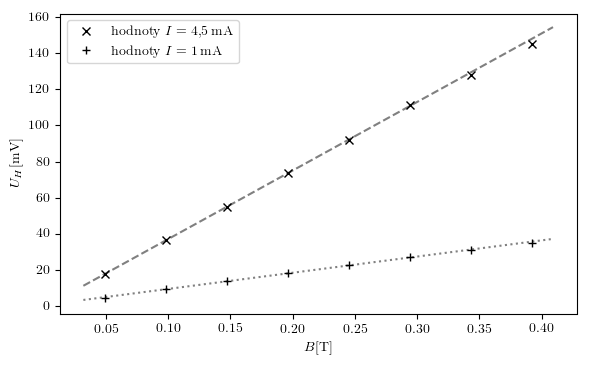

In [147]:
fig = plt.figure()
ax = plt.axes()

params1, errs1 = fit(primka, noms(df_1mA.B), noms(df_1mA.U), sigma=stds(df_1mA.U))
params45, errs45 = fit(primka, noms(df_45mA.B), noms(df_45mA.U), sigma=stds(df_45mA.U))

C1 = uf(params1[0], errs1[0])
C45 = uf(params45[0], errs45[0])

ax.plot(*curve(noms(df_1mA.B), primka, params1), ":", c="gray")
ax.plot(*curve(noms(df_45mA.B), primka, params45), "--", c="gray")

ax.plot(noms(df_45mA.B), noms(df_45mA.U), "kx", label="hodnoty $I = \SI{4,5}{mA}$")
ax.plot(noms(df_1mA.B) , noms(df_1mA.U) , "k+", label="hodnoty $I = \SI{1}{mA}$")

ax.set_xlabel("$B[\si{T}]$")
ax.set_ylabel("$U_{H}[\si{mV}]$")
ax.legend()

fig.tight_layout()
fig.savefig("../plot/u2.pdf")

## Úkol 3

In [138]:
vodivost = rozm_vzorku['l'] * A / (rozm_vzorku['t'] * rozm_vzorku['d'])
print(f"Vodivost = {vodivost}")

Vodivost = 5.30+/-0.04


In [149]:
R_H_1 = rozm_vzorku['t']*1e-3 * C1*1e-3 / 1e-3
print(R_H_1)

0.0647+/-0.0010


In [148]:
R_H_45 = rozm_vzorku['t']*1e-3 * C45*1e-3 / 4.5e-3
print(R_H_45)

0.0609+/-0.0005


In [151]:
R_H = (R_H_1 + R_H_45) / 2
R_H

0.06281388593729459+/-0.0006346292338586541

## Úkol 4

In [156]:
n = r_h / (e * R_H)
print(n)

(1.171+/-0.012)e+20


In [158]:
mi_n = vodivost / (e*n)
print(mi_n)

0.2824+/-0.0022


## Pokusy

In [162]:
print(C45)

380.7+/-1.4
